# 3. Hydro: Get Sub-Regions of The Loaded Data

## Load the Data

In [1]:
using Mera, PyPlot
info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14")
gas  = gethydro(info, :rho, lmax=10, smallr=1e-5); 

┌ Info: Precompiling Mera [02f895e8-fdb1-4346-8fe6-c721699f5126]
└ @ Base loading.jl:1273



*__   __ _______ ______   _______ 
|  |_|  |       |    _ | |   _   |
|       |    ___|   | || |  |_|  |
|       |   |___|   |_||_|       |
|       |    ___|    __  |       |
| ||_|| |   |___|   |  | |   _   |
|_|   |_|_______|___|  |_|__| |__|

[Mera]: 2020-02-03T16:19:09.27

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2019-11-01T17:35:21.051
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-----------------------------

100%|███████████████████████████████████████████████████| Time: 0:03:08


Memory used for data table :186.1558656692505 MB
-------------------------------------------------------



## Cuboid Region

### Create projections of the full box:

In [2]:
proj_z = projection(gas, :sd, :Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas, :sd, :Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas, :sd, :Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:01:02
100%|███████████████████████████████████████████████████| Time: 0:01:02
100%|███████████████████████████████████████████████████| Time: 0:00:59


The generated objects include, e.g. the extent of the processed domain, that can be used to declare the specific range of the plots, while the field *cextent* gives the extent related to a given center (default: box center).

In [3]:
propertynames(proj_z)

(:maps, :maps_unit, :maps_lmax, :maps_mode, :lmax_projected, :lmin, :lmax, :ranges, :extent, :cextent, :ratio, :boxlen, :smallr, :smallc, :scale, :info)

#### Cuboid Region: The red lines show the region that we want to cutout as a sub-region from the full data:

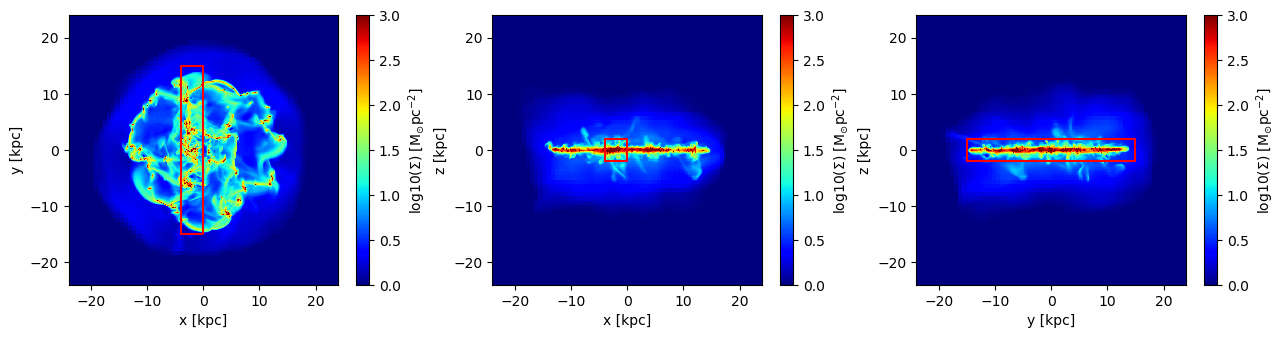

In [4]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cuboid Region: Cutout the data assigned to the object *gas*

Note: The selected regions can be given relative to a user given center or to the box corner [0., 0., 0.] by default. The user can choose between standard notation [0:1] (default) or physical length-units, defined in e.g. info.scale :

In [5]:
gas_subregion = subregion( gas, :cuboid, 
                            xrange=[-4., 0.], 
                            yrange=[-15., 15.], 
                            zrange=[-2., 2.], 
                            center=[:boxcenter], 
                            range_unit=:kpc);

[Mera]: 2020-01-26T19:09:50.615

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :105.38585186004639 MB
-------------------------------------------------------



The function *subregion* creates a new object with the same type as the object created by the function *gethydro* :

In [6]:
typeof(gas_subregion)

HydroDataType

#### Cuboid Region: Projections of the sub-region. 
The coordinates center is the center of the box by default:

In [7]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:16
100%|███████████████████████████████████████████████████| Time: 0:00:18
100%|███████████████████████████████████████████████████| Time: 0:00:16


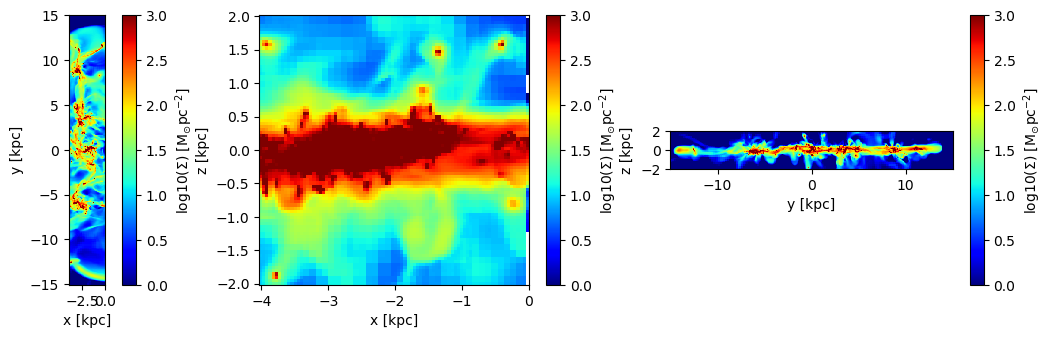

In [8]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cuboid Region: Get the data outside of the selected region (inverse selection):

In [9]:
gas_subregion = subregion( gas, :cuboid,
                                    xrange=[-4., 0.], 
                                    yrange=[-15., 15.],
                                    zrange=[-2., 2.], 
                                    center=[:boxcenter], 
                                    range_unit=:kpc, 
                                    inverse=true);

[Mera]: 2020-01-26T19:11:12.99

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :304.1581144332886 MB
-------------------------------------------------------



In [10]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:48
100%|███████████████████████████████████████████████████| Time: 0:00:46
100%|███████████████████████████████████████████████████| Time: 0:00:45


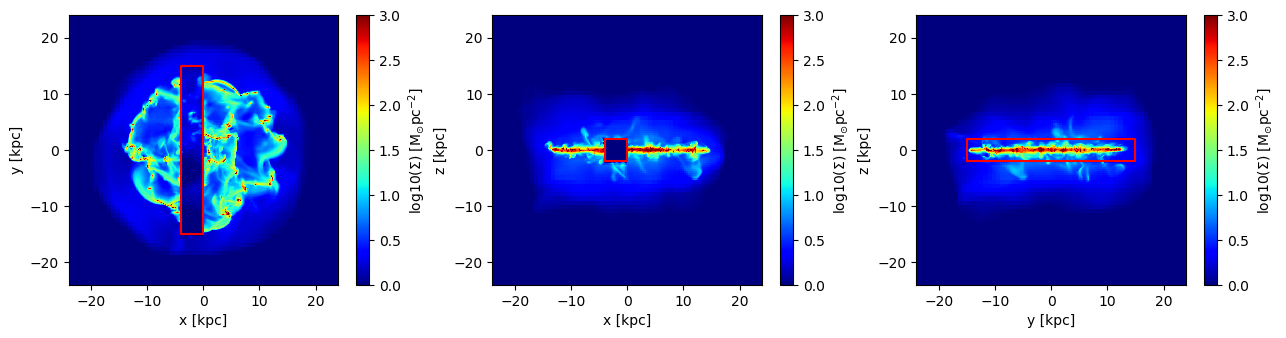

In [12]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Cylindrical Region
#### Create projections of the full box:

In [13]:
proj_z = projection(gas, :sd, :Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas, :sd, :Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas, :sd, :Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:01:04
100%|███████████████████████████████████████████████████| Time: 0:01:05
100%|███████████████████████████████████████████████████| Time: 0:01:03


#### Cylindrical Region: The red lines show the region that we want to cutout as a sub-region from the full data:

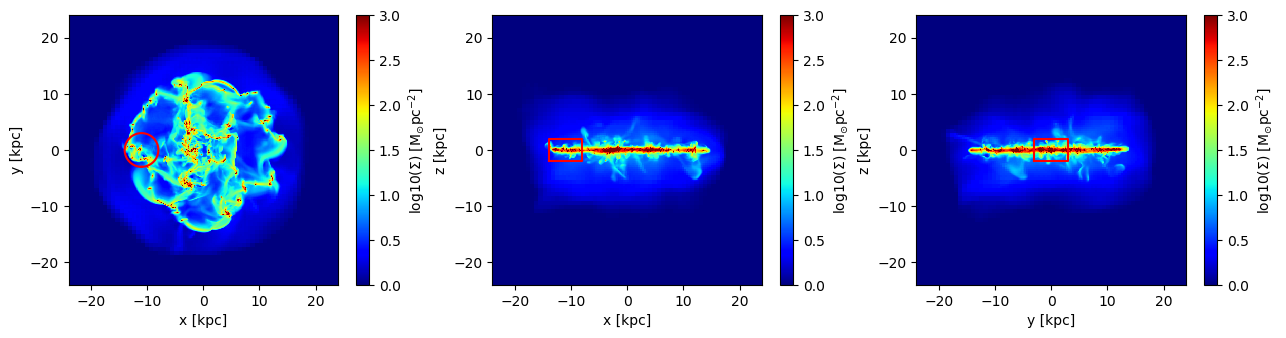

In [14]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Region: Cutout the data assigned to the object *gas*
Select the ranges of the cylinder in the unit "kpc", relative to the given center [13., 24., 24.]. The height refers to both z-directions from the plane.

In [15]:
gas_subregion = subregion(  gas, :cylinder,
                            radius=3., 
                            height=2., 
                            range_unit=:kpc, 
                            center=[13., :bc, :bc]); # direction=:z, by default

[Mera]: 2020-01-26T19:17:28.845

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :21.88045024871826 MB
-------------------------------------------------------



#### Cylindrical Region: Projections of the sub-region. 
The coordinates center is the center of the box by default:

In [16]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:03
100%|███████████████████████████████████████████████████| Time: 0:00:03
100%|███████████████████████████████████████████████████| Time: 0:00:03


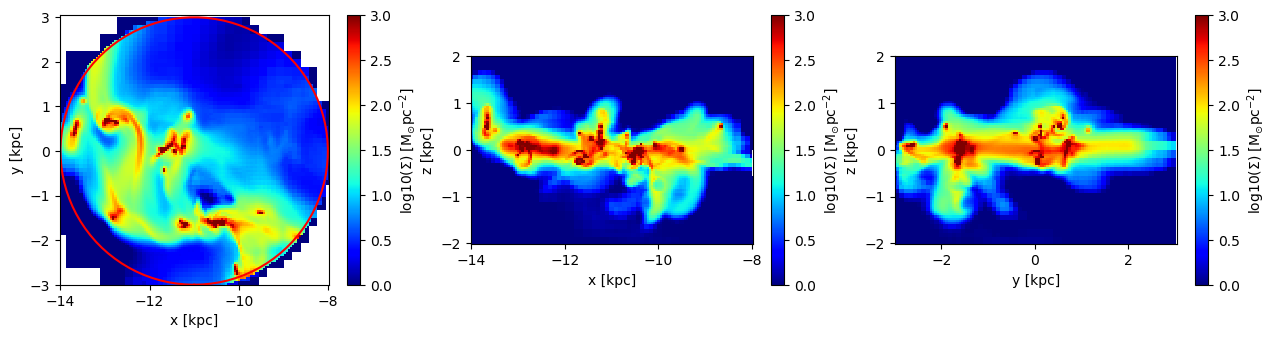

In [17]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)

xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)

xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Region: Projections of the sub-region rekated ti a given data center:

In [18]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, data_center=[13., 24.,24.], data_center_unit=:kpc, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, data_center=[13., 24.,24.], data_center_unit=:kpc, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, data_center=[13., 24.,24.], data_center_unit=:kpc, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:03
100%|███████████████████████████████████████████████████| Time: 0:00:03
100%|███████████████████████████████████████████████████| Time: 0:00:03


#### The ranges of the plots are now adapted to the given data center:

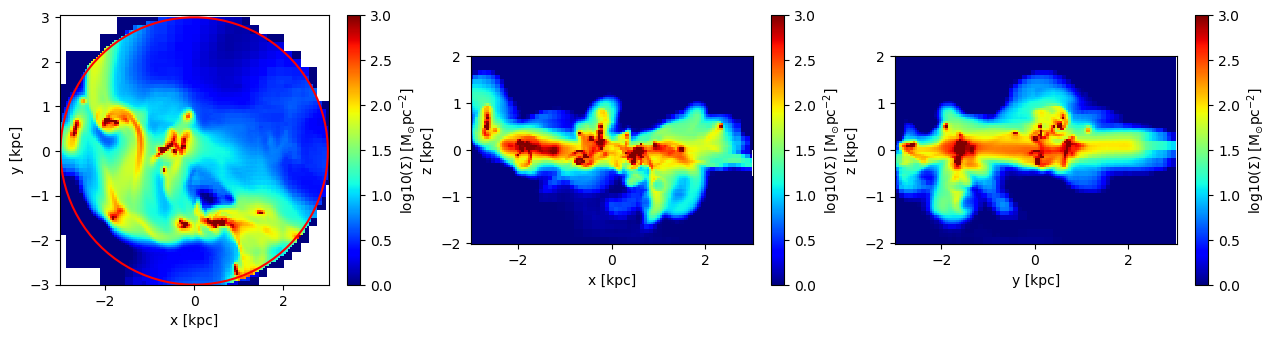

In [19]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta), 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)

xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)

xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Region: Get the data outside of the selected region (inverse selection):

In [20]:
gas_subregion = subregion(  gas, :cylinder, 
                            radius=3., 
                            height=2., 
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc], 
                            inverse=true); # direction=:z, by default

[Mera]: 2020-01-26T19:18:03.758

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :387.6635160446167 MB
-------------------------------------------------------



In [21]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:58
100%|███████████████████████████████████████████████████| Time: 0:00:57
100%|███████████████████████████████████████████████████| Time: 0:01:00


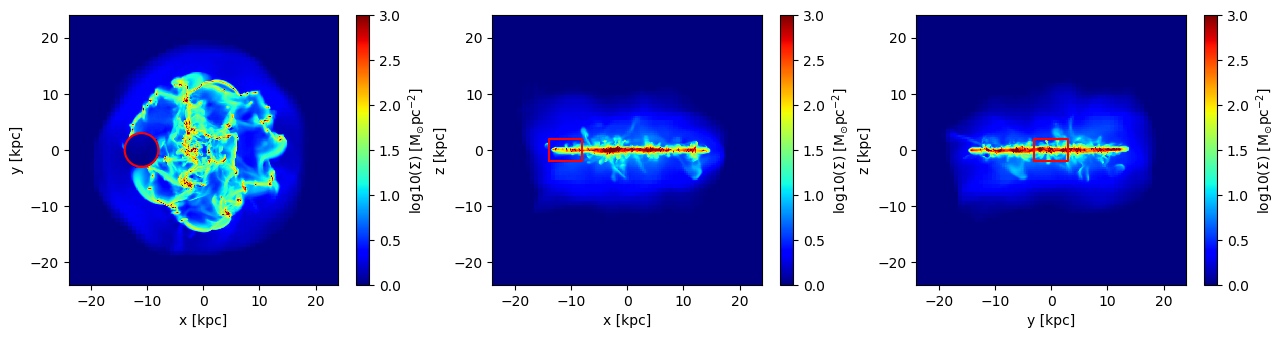

In [22]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Spherical Region
### Create projections of the full box:

In [23]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:01:06
100%|███████████████████████████████████████████████████| Time: 0:01:00
100%|███████████████████████████████████████████████████| Time: 0:01:00


#### Spherical Region: The red lines show the region that we want to cutout as a sub-region from the full data:

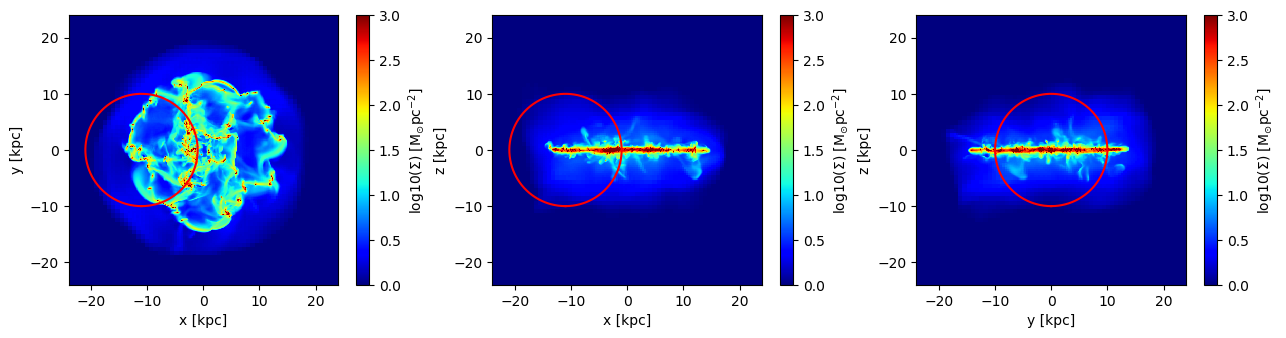

In [24]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Region: Cutout the data assigned to the object *gas*
Select the radius of the sphere in the unit "kpc", relative to the given center [13., 24., 24.]:

In [25]:
gas_subregion = subregion(  gas, :sphere, 
                            radius=10., 
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc]);

[Mera]: 2020-01-26T19:24:36.627

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :125.48733806610107 MB
-------------------------------------------------------



#### Spherical Region: Projections of the sub-region. 
The coordinates center is the center of the box by default:

In [26]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:18
100%|███████████████████████████████████████████████████| Time: 0:00:18
100%|███████████████████████████████████████████████████| Time: 0:00:18


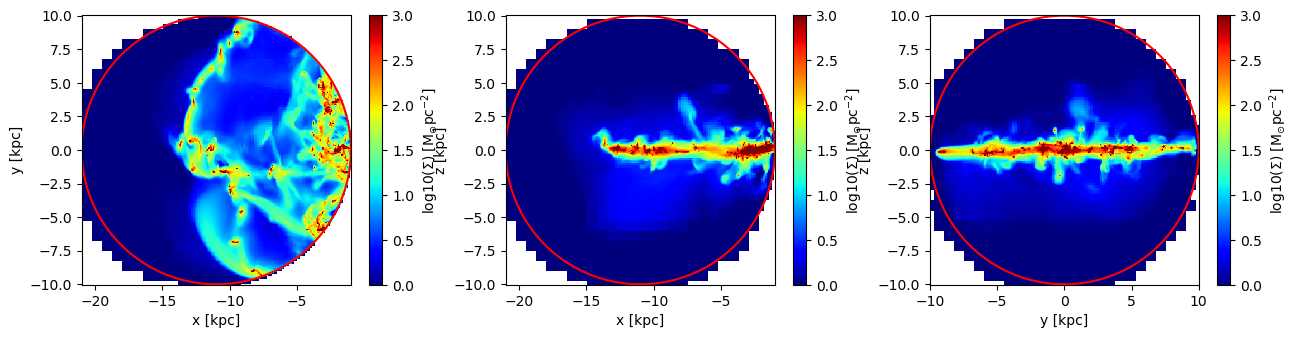

In [27]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Region: Get the data outside of the selected region (inverse selection):

In [28]:
gas_subregion = subregion(  gas, :sphere, 
                            radius=10., 
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc], 
                            inverse=true);

[Mera]: 2020-01-26T19:25:46.373

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :284.0566282272339 MB
-------------------------------------------------------



In [29]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:49
100%|███████████████████████████████████████████████████| Time: 0:00:41
100%|███████████████████████████████████████████████████| Time: 0:00:42


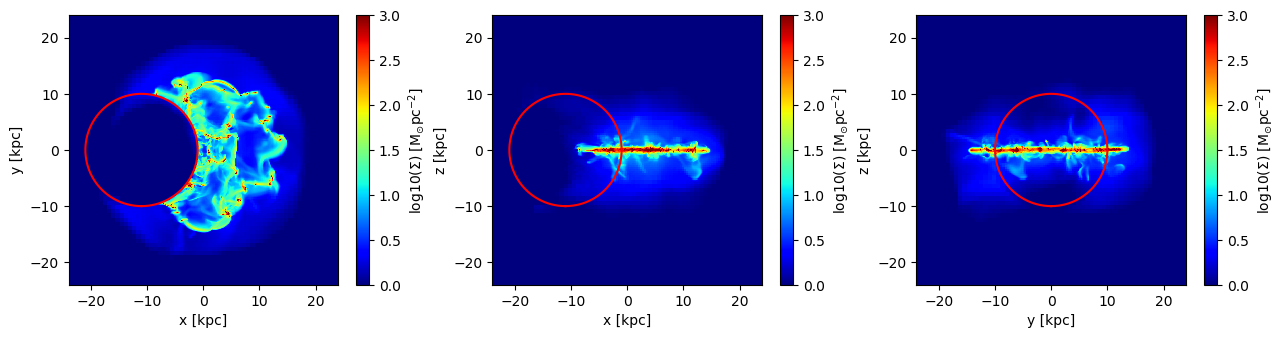

In [30]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Combined/Nested/Shell Sub-Regions

#### The sub-region functions can be used in any combination with each other! (Combined with overlapping or nested ranges)

One Example:

In [24]:
comb_region = subregion(gas, :cuboid, xrange=[-8.,8.], yrange=[-8.,8.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc, verbose=false)
comb_region2 = subregion(comb_region, :sphere, radius=12., center=[40.,24.,24.], range_unit=:kpc, inverse=true, verbose=false)
comb_region3 = subregion(comb_region2, :sphere, radius=12., center=[8.,24.,24.], range_unit=:kpc, inverse=true, verbose=false);
comb_region4 = subregion(comb_region3, :sphere, radius=12., center=[24.,5.,24.], range_unit=:kpc, inverse=true, verbose=false);
comb_region5 = subregion(comb_region4, :sphere, radius=12., center=[24.,43.,24.], range_unit=:kpc, inverse=true, verbose=false);

In [25]:
proj_z = projection(comb_region5, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(comb_region5, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(comb_region5, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

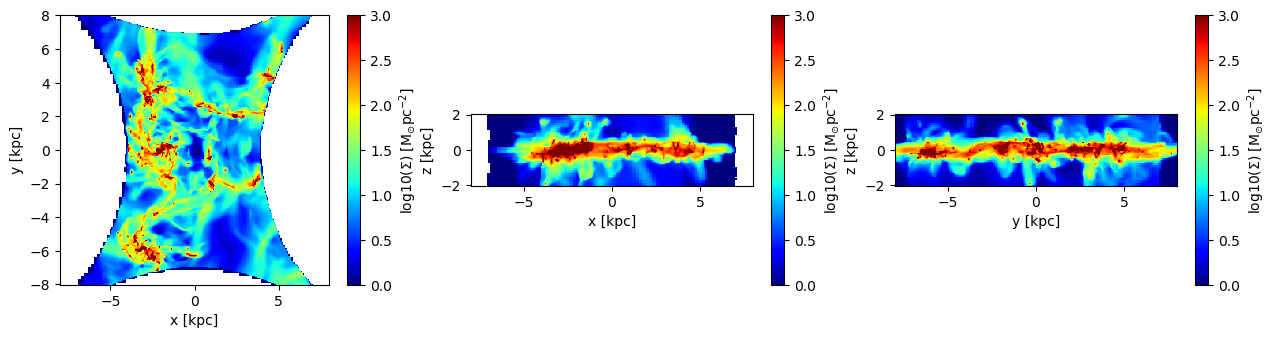

In [26]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Cylindrical Shell
#### Create projections of the full box:

In [2]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:01:02
100%|███████████████████████████████████████████████████| Time: 0:01:06
100%|███████████████████████████████████████████████████| Time: 0:01:05


#### Cylindrical Shell: The red lines show the shell that we want to cutout as a sub-region from the full data:

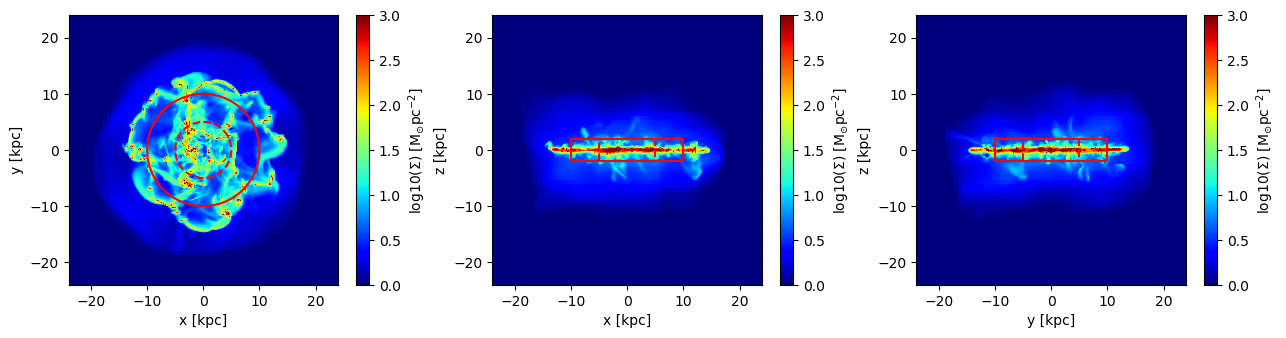

In [3]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Shell: 
Pass the height of the cylinder and the inner/outer radius of the shell in the unit "kpc", relative to the box center [24., 24., 24.]:

In [2]:
gas_subregion = shellregion( gas, :cylinder, 
                            radius=[5., 10.], 
                            height=2., 
                            range_unit=:kpc, 
                            center=[:boxcenter]);

[Mera]: 2020-01-26T19:52:49.383

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :118.33790874481201 MB
-------------------------------------------------------



In [3]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:18
100%|███████████████████████████████████████████████████| Time: 0:00:18
100%|███████████████████████████████████████████████████| Time: 0:00:18


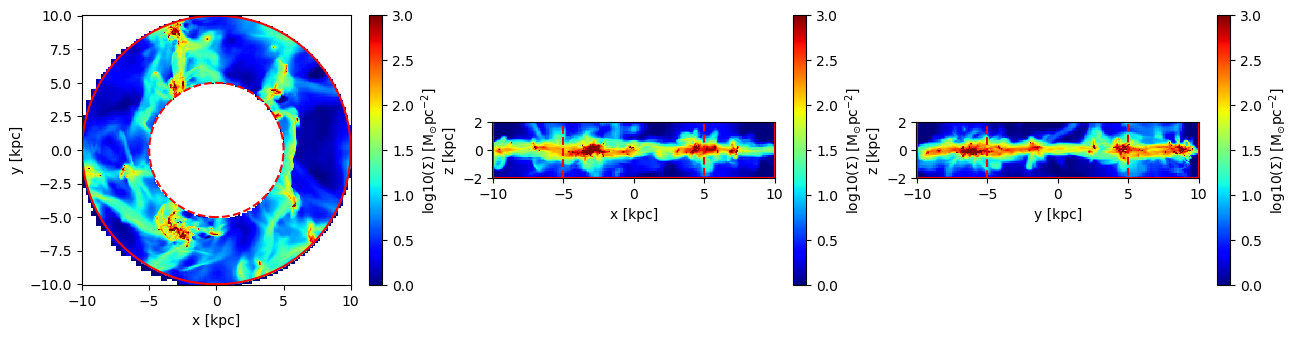

In [4]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Shell: Get the data outside of the selected shell (inverse selection):

In [5]:
gas_subregion = shellregion(gas, :cylinder, 
                            radius=[5., 10.], 
                            height=2., 
                            range_unit=:kpc, 
                            center=[:boxcenter], 
                            inverse=true);

[Mera]: 2020-01-26T19:55:07.625

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :291.20605754852295 MB
-------------------------------------------------------



In [6]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:47
100%|███████████████████████████████████████████████████| Time: 0:00:46
100%|███████████████████████████████████████████████████| Time: 0:00:50


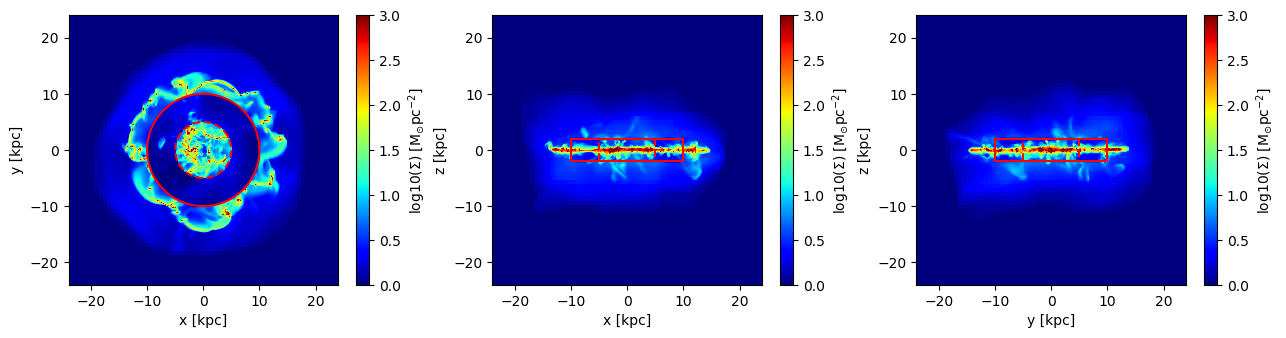

PyObject <matplotlib.colorbar.Colorbar object at 0x1489d8208>

In [7]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

## Spherical Shell
#### Create projections of the full box:

In [8]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:01:11
100%|███████████████████████████████████████████████████| Time: 0:01:03
100%|███████████████████████████████████████████████████| Time: 0:01:06


#### Spherical Shell: The red lines show the shell that we want to cutout as a sub-region from the full data:

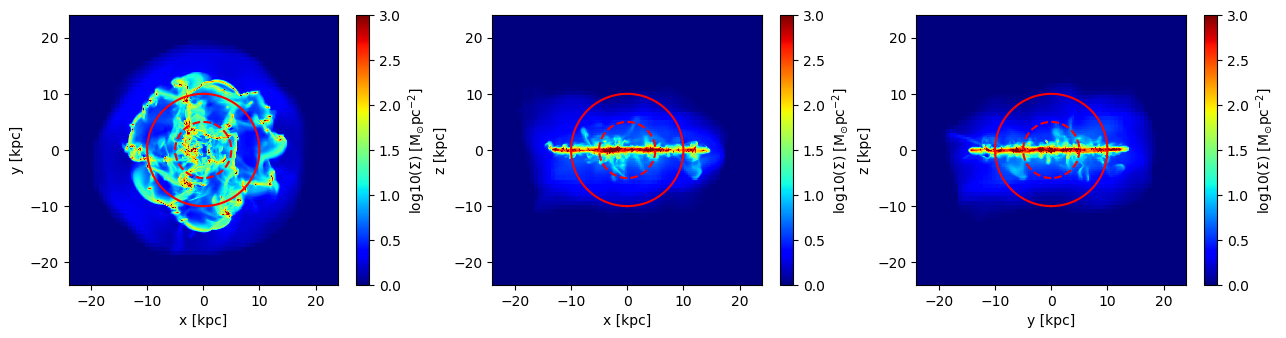

In [9]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red",ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Shell: 
Select the inner and outer radius of the spherical shell in unit "kpc", relative to the box center [24., 24., 24.]:

In [2]:
gas_subregion = shellregion(gas, :sphere, 
                            radius=[5., 10.], 
                            range_unit=:kpc, 
                            center=[24.,24.,24.]);

[Mera]: 2020-01-26T21:42:21.169

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :124.41647624969482 MB
-------------------------------------------------------



#### Spherical Shell: Projections of the shell-region. 
The coordinates center is the center of the box by default:

In [3]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:21
100%|███████████████████████████████████████████████████| Time: 0:00:21
100%|███████████████████████████████████████████████████| Time: 0:00:20


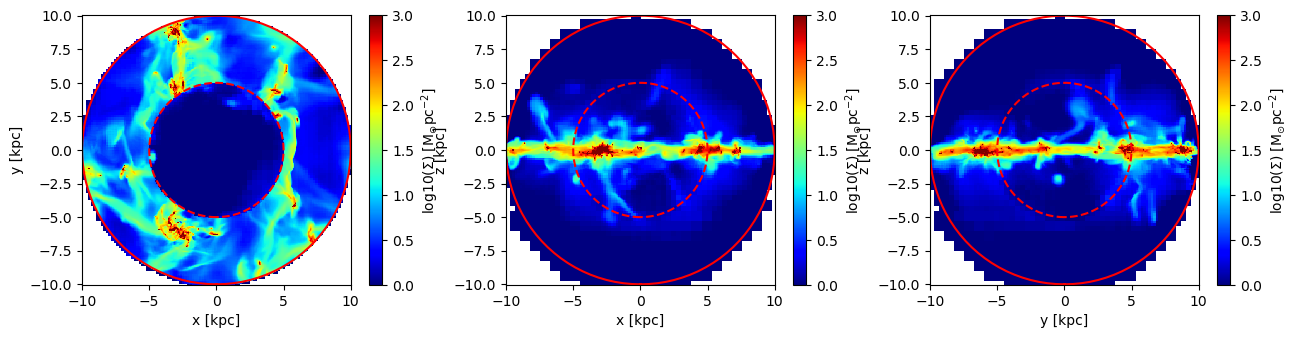

In [4]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Shell: Get the data outside of the selected shell-region (inverse selection):

In [5]:
gas_subregion = shellregion(gas, :sphere,
                            radius=[5., 10.], 
                            range_unit=:kpc, 
                            center=[:boxcenter], 
                            inverse=true);

[Mera]: 2020-01-26T21:44:12.042

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :285.12749004364014 MB
-------------------------------------------------------



In [6]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:54
100%|███████████████████████████████████████████████████| Time: 0:00:51
100%|███████████████████████████████████████████████████| Time: 0:00:46


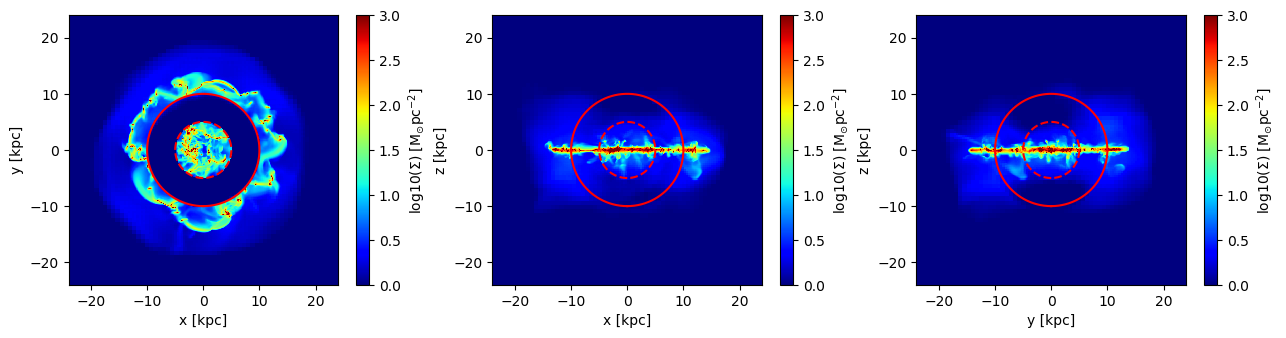

In [7]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);